In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [2]:
data = pd.read_csv("/home/greeshma/Downloads/project_ML/archive/Maternal Health Risk Data Set.csv")

In [3]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
data.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [5]:
data.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

/home/greeshma/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


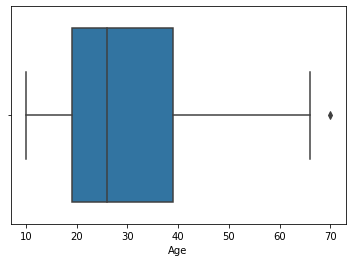

In [6]:
import seaborn as sns
sns.boxplot(data['Age'])
plt.show()

/home/greeshma/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


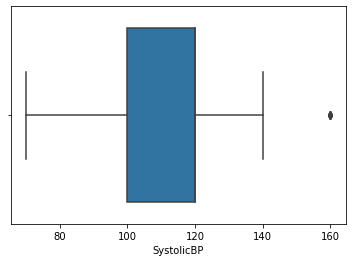

In [7]:
import seaborn as sns
sns.boxplot(data['SystolicBP'])
plt.show()

/home/greeshma/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


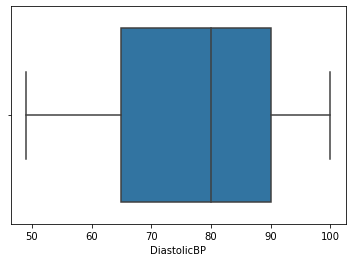

In [8]:
import seaborn as sns
sns.boxplot(data['DiastolicBP'])
plt.show()

/home/greeshma/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


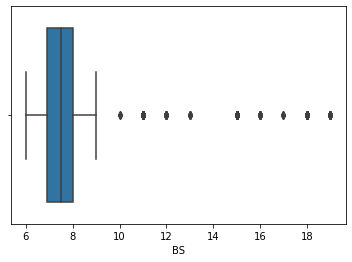

In [9]:
import seaborn as sns
sns.boxplot(data['BS'])
plt.show()

/home/greeshma/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


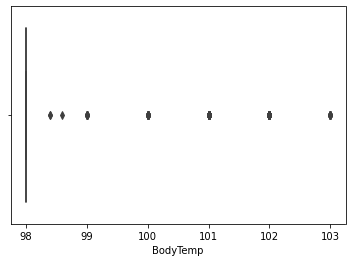

In [10]:
import seaborn as sns
sns.boxplot(data['BodyTemp'])
plt.show()

/home/greeshma/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


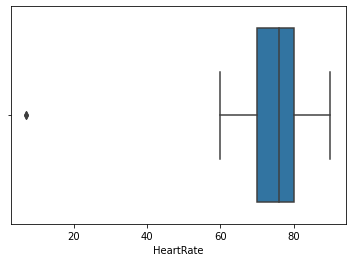

In [11]:
import seaborn as sns
sns.boxplot(data['HeartRate'])
plt.show()

In [12]:
X = data.drop(['RiskLevel'],axis=1)

y = data['RiskLevel']

In [13]:
#entropy calculation
from scipy.stats import entropy
entropy([5, 5], base=2)

1.0

In [14]:
#UDF(User Defined Function) for Calculating entropy
import math
def Entropy(X):  #Entropy = -(Pi*logPi)  - [Pi = x/sum(X)]
    entropy=0
    total=sum(X)
    for x in X:
        entropy+=(x/total)*math.log2(x/total)
    entropy=entropy*(-1)
    return(entropy)
Entropy([5,5])

1.0

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42) #0.67 data will be for training.



In [16]:
from sklearn.ensemble import RandomForestClassifier

cls = RandomForestClassifier()   #cls is obj of RFC 

In [17]:
cls.fit(X_train,y_train)

RandomForestClassifier()

In [18]:
y_pred = cls.predict(X_test)

In [19]:
#confusison matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[78,  1,  6],
       [ 7, 95, 26],
       [12, 15, 95]])

In [20]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8

In [21]:
#using hyperparameter tuning

In [22]:
#importing Random Forest Classifier from sklearn.ensemble

from sklearn.model_selection import GridSearchCV #GridSearchCV is for parameter tuning

from sklearn.ensemble import RandomForestClassifier

cls = RandomForestClassifier()

In [23]:
n_estimators = [25,50,75,100] #number of decision trees in the forest, default = 100

criterion = ['gini','entropy'] #criteria for choosing nodes default = 'gini'

max_depth = [3,5,10] #maximum number of nodes in a tree default = None (it will go till all possible nodes)

parameters={'n_estimators': n_estimators,'criterion':criterion,'max_depth':max_depth} #this will undergo 4*2*3 = 24 iterations

RFC_cls = GridSearchCV(cls, parameters)

RFC_cls.fit(X_train,y_train)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [25, 50, 75, 100]})

In [24]:
#to get the best parameter for the model
RFC_cls.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50}

In [28]:
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier(n_estimators=50,criterion='gini',max_depth=10)

In [29]:
cls.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [30]:
y_pred=cls.predict(X_test)

In [31]:
#confusison matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[77,  3,  5],
       [ 5, 97, 26],
       [10, 33, 79]])

In [32]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.755223880597015

In [28]:
Results= pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=y_pred
Results['index']=Results.index
Results.head()

,Actual,Predicted,index
752,mid risk,mid risk,752
519,high risk,high risk,519
210,high risk,high risk,210
611,low risk,low risk,611
914,low risk,low risk,914
